In [1]:
from glob import glob
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
import os
import fiona
import rasterio
from rasterio.mask import mask
from rasterio.plot import show
import rasterio as rio
from osgeo import gdal
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

import plotly.graph_objects as go

np.seterr(divide='ignore', invalid='ignore')


{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [11]:

sentinel_bands = glob(r"C:\Users\bright\Desktop\aim_ishango\data\R10m\*B?*.jp2")

sentinel_bands.sort()

l = []

for i in sentinel_bands:
  with rio.open(i, 'r') as f:
    #print(i)
    #print(f.shape)
    #print('---------------------------------------------')
    l.append(f.read(1))
    


In [12]:
stackBand = np.stack(l)

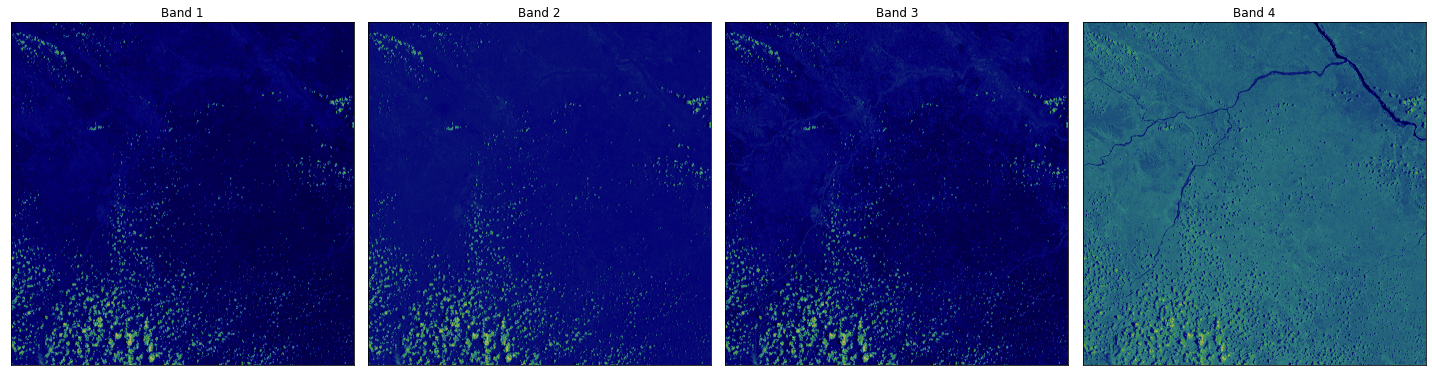

In [109]:
#Visualizing all the bands....
ep.plot_bands(stackBand, cmap = 'gist_earth', figsize = (20,10), cols = 4, cbar = False)
plt.show()

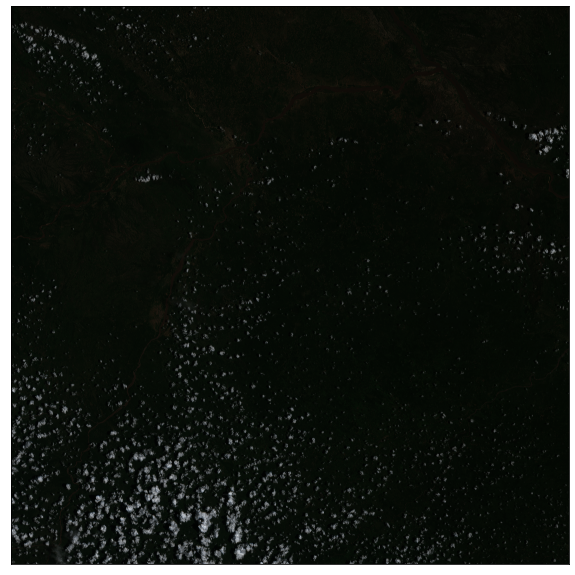

In [98]:
#RGB composite, visible to the eye
rgb = ep.plot_rgb(stackBand, rgb=(2,1,0), figsize=(10,16))
plt.show()

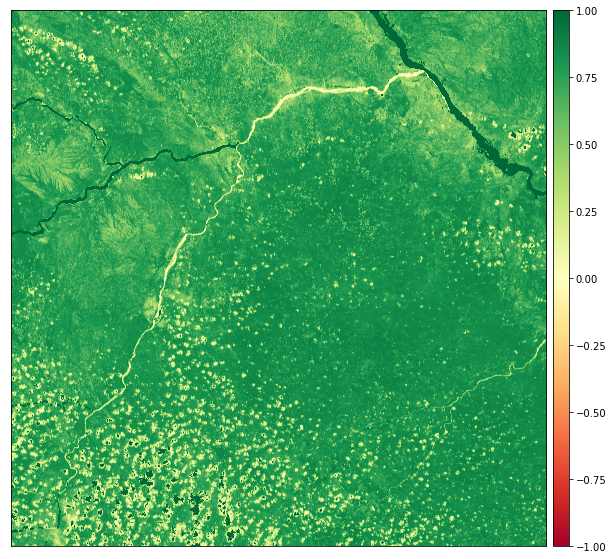

In [61]:
#NDVI of the area, Vlaues close to 1 showing vegetation such as crops
ndvi = es.normalized_diff(stackBand[3], stackBand[2])

ep.plot_bands(ndvi, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10, 14))

plt.show()

In [63]:
#Visible Atmospherically Resistant Index, Emphasis on vegetaion while mitigating atmospheric and illumination effects
#vari = (green-red)/(green + red - blue)
vari = (stackBand[1]-stackBand[2])/(stackBand[1]+stackBand[2]-stackBand[0])
ep.plot_bands(vari, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10, 14))

plt.show()

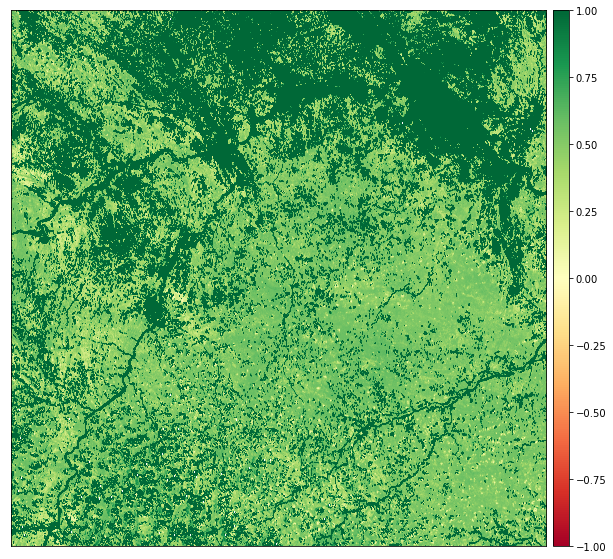

In [99]:
#An attempt to clip an imagery band at the area of interest. 
aoiFile = fiona.open(r"C:\Users\bright\Desktop\aim_ishango\shapefiles\MOZ_adm\MOZ_adm1.shp")
aoiGeom = [aoiFile[0]['geometry']]

In [100]:
with rasterio.open(r"C:\Users\bright\Desktop\aim_ishango\data\Mozambique_SRTM30meters.tif") as src:
        #clip the raster with polygon
        out_image, out_transform = rasterio.mask.mask(src, aoiGeom, crop=True)
        #copy meta data of the src
        out_meta = src.meta.copy()

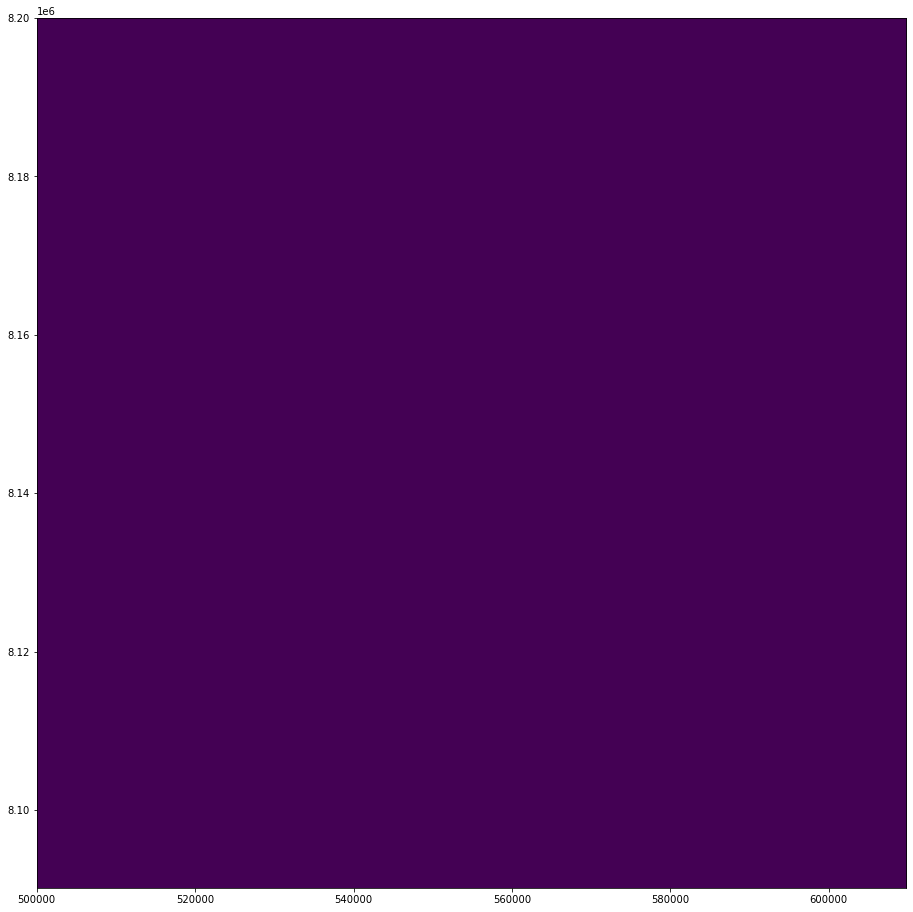

In [106]:
#An attempt to clip an imagery band at the area of interest. 
aoiFile = fiona.open(r"C:\Users\bright\Desktop\aim_ishango\shapefiles\MOZ_adm\MOZ_adm1.shp")
aoiGeom = [aoiFile[0]['geometry']]

##################################################################################################
with rasterio.open(r"C:\Users\bright\Desktop\aim_ishango\data\Mozambique_SRTM30meters.tif") as src:
        #clip the raster with polygon
        out_image, out_transform = rasterio.mask.mask(src, aoiGeom, crop=True)
        #copy meta data of the src
        out_meta = src.meta.copy()
#################################################################################################
bandPath = (r"C:\Users\bright\Desktop\aim_ishango\data\R10m")
bandNames = os.listdir(bandPath)
#clip one raster B01
bandName = bandNames[0]

out_meta.update({"driver": 'JP2OpenJPEG',
                 "height": outImage.shape[1],
                 "width": outImage.shape[2],
                 "transform": outTransform})
outRaster = rasterio.open("C:/Users/bright/Desktop/aim_ishango/data"+bandName, "w", **out_meta) 
outRaster.write(outImage)
outRaster.close()
#plot original and clipped rasters
bandZero = rasterio.open("C:/Users/bright/Desktop/aim_ishango/data"+bandName,'r')
fig, ax = plt.subplots(figsize=(16,16))
show(rasterBand, cmap='Blues', ax=ax)
show(bandZero, cmap='viridis', ax=ax)
ax.set_ylim(rasterBand.bounds.bottom,rasterBand.bounds.top)
ax.set_xlim(rasterBand.bounds.left,rasterBand.bounds.right)
plt.show()
bandZero.close()